<h1> The Importance of Personality Traits in Agile Software Development: A Case Study </h1>
<hr/>

<h2> 1.0 Developers` personality insight analysis <hr />
using the open source datasets of eoght software development teams JIRA logs </h2>

<h3>1.0.1 load libraries and datasets</h3>

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Rectangle
import seaborn as sns
import re
from collections import Counter

In [112]:
changelog = pd.read_csv('jiradataset_changelog.csv')
issues = pd.read_csv('jiradataset_issues.csv')
sprints = pd.read_csv('jiradataset_sprints.csv')
users = pd.read_csv('jiradataset_users.csv')

<h3> 1.0.2 Check the datasets </h3>



In [113]:
changelog.head(3)

,author,created,field,fieldtype,from,fromString,key,project,to,toString
0,jvalkeal,2016-03-03 18:40:53.171,status,jira,10000,To Do,XD-3751,xd,3,In Progress
1,jvalkeal,2016-03-03 18:41:19.429,Pull Request URL,custom,NaN,NaN,XD-3751,xd,NaN,https://github.com/spring-projects/spring-xd/p...
2,jvalkeal,2016-03-03 18:41:19.429,status,jira,3,In Progress,XD-3751,xd,10006,In PR


In [114]:
issues.head(3)

,fields.assignee.name,fields.components,fields.created,fields.creator.name,fields.description,fields.fixVersions,fields.issuetype.name,fields.issuetype.subtask,fields.priority.name,fields.reporter.name,...,fields.status.name,fields.status.statusCategory.name,fields.summary,fields.updated,fields.versions,fields.watches.watchCount,key,storypoints,project,sprint
0,NaN,"[{u'id': u'12786', u'self': u'https://jira.spr...",2016-03-31T22:35:55.000+0000,thomas.risberg,"The MapReduce samples should have ""yarn.resour...",[],Improvement,False,Minor,thomas.risberg,...,To Do,To Do,"Add ""yarn.resourcemanager.scheduler.address"" t...",2016-03-31T22:35:55.000+0000,[],1,XD-3753,2.0,xd,NaN
1,NaN,"[{u'id': u'12784', u'self': u'https://jira.spr...",2016-03-14T18:09:51.000+0000,manju4ever,When i use the admin-ui web portal which runs ...,[],Bug,False,Trivial,manju4ever,...,To Do,To Do,Admin UI login Page failing to load due to req...,2016-03-14T18:09:51.000+0000,"[{u'archived': False, u'description': u'1.3.0 ...",1,XD-3752,20.0,xd,NaN
2,jvalkeal,[],2016-03-03T13:22:14.000+0000,jvalkeal,In a case where reactor's ringbuffer is full a...,[],Bug,False,Major,jvalkeal,...,In PR,In Progress,gpfdist may fail to shutdown with backlog,2016-03-03T18:41:19.000+0000,"[{u'archived': False, u'name': u'1.3.1', u'sel...",1,XD-3751,5.0,xd,NaN


In [115]:
sprints.head(3)

,key,project,sprint.completeDate,sprint.endDate,sprint.id,sprint.name,sprint.startDate,sprint.state
0,XD-3744,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED
1,XD-3743,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED
2,XD-3742,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED


In [116]:
users.head(3)

,Unnamed: 0,displayName,emailAddress,name,project,role,timeZone
0,0,NaN,NaN,NaN,xd,assignee,NaN
1,2,Janne Valkealahti,janne dot valkealahti at gmail dot com,jvalkeal,xd,assignee,Europe/London
2,5,Gary Russell,grussell at gopivotal dot com,grussell,xd,assignee,America/New_York


In [117]:
changelog.head(3)

,author,created,field,fieldtype,from,fromString,key,project,to,toString
0,jvalkeal,2016-03-03 18:40:53.171,status,jira,10000,To Do,XD-3751,xd,3,In Progress
1,jvalkeal,2016-03-03 18:41:19.429,Pull Request URL,custom,NaN,NaN,XD-3751,xd,NaN,https://github.com/spring-projects/spring-xd/p...
2,jvalkeal,2016-03-03 18:41:19.429,status,jira,3,In Progress,XD-3751,xd,10006,In PR



<h3>1.1 Check the datasets for the manually written textual values</h3>
<h5>1.1.1 within 'changelog' take two examplary row values from each unique field, store into dataframe, export into csv and check manually</h5>

In [118]:
# declare the empty series
i_row = []
field_row = []
from_row = []
to_row = []
from_string_row = []
to_string_row = []

# loop through each unique field, take top two values from the columns 'fromString', 'toString', 'from' and 'to'
# append these two values to the respective series
# create dataframe 'df' with these filled series, and export it to .csv file, and check it manually.
i = 1
for field in changelog['field'].unique():
    from_str = changelog[changelog['field'] == field]['fromString'].head(2)
    from_ = changelog[changelog['field'] == field]['from'].head(2)
    to_str = changelog[changelog['field'] == field]['toString'].head(2)
    to_ = changelog[changelog['field'] == field]['to'].head(2)
    i_row.append(i)
    field_row.append(field)
    from_row.append(from_str)
    to_row.append(to_str)
    from_string_row.append(from_)
    to_string_row.append(to_)
    i = i + 1
df = pd.DataFrame({'id':i_row,
                   'field':field_row, 
                   'from':from_row, 
                   'to':to_row, 
                   'fromString':from_string_row, 
                   'toString':to_string_row })
df.to_csv('fields_check.csv')
df.head()

,id,field,from,to,fromString,toString
0,1,status,0 To Do 2 In Progress Name: fromSt...,0 In Progress 2 In PR Name: toStri...,"0 10000 2 3 Name: from, dtype: object","0 3 2 10006 Name: to, dtype: object"
1,2,Pull Request URL,"1 NaN 13 NaN Name: fromString, dtype: o...",1 https://github.com/spring-projects/sprin...,"1 NaN 13 NaN Name: from, dtype: object","1 NaN 13 NaN Name: to, dtype: object"
2,3,summary,3 Can completely remove module after puttin...,3 Can completely remove custom module after...,"3 NaN 5 NaN Name: from, dtype: object","3 NaN 5 NaN Name: to, dtype: object"
3,4,issuetype,"4 Story 17 Story Name: fromString, dtyp...",4 Bug 17 Improvement Name: toSt...,"4 8 17 8 Name: from, dtype: object","4 1 17 4 Name: to, dtype: object"
4,5,description,7 Custom conversion is broken.\r\r\n\r\r\nI...,7 Custom conversion is broken.\r\r\n\r\r\nI...,"7 NaN 8 NaN Name: from, dtype: object","7 NaN 8 NaN Name: to, dtype: object"


**After checking the fields, detected the ones withthe written textual values:** <hr/>
*'summary', 'description', 'Acceptance Criteria', 'Comment', 'Epic Name',
 'Out of Scope', 'QA Test Plan', 'Epic/Theme', 'Migration Impact', 'Business Value'*

<h3> 1.2 Prepare 'changelog' dataset with needed columns  </h3> <hr/>
Since the jira tasks dataset only have one reporter for each jira task, we need to find the author of actual changes of the textual fields with change log file, as in changelog every action is stored and the author of the change is tracked. 

In [119]:
# filter changelog with the textual fields
log_filtered = changelog[changelog['field'].isin(['summary', 'description', 'Acceptance Criteria', 'Comment', 'Epic Name',
 'Out of Scope', 'QA Test Plan', 'Epic/Theme', 'Migration Impact', 'Business Value'])]

log_filtered.to_csv('log_filtered.csv')
# take only necessary columns - key (Jira task unique key-name), project (one of the eight project codes), 
# author (author of change), field (what field has been changed), created (date of the change action),
# toString (what textual value was assigned to the field), 
# and from(what was the value of the field, this only works for comments)

cols = ['key', 'project', 'author', 'field', 'created', 'toString', 'from']
log_cols = log_filtered[cols].copy(deep=True)
log_cols[log_cols['field']!='Comment']['from'] = np.NaN
log_cols['text'] = log_cols['from'].combine_first(log_cols['toString'])

newcols = ['key', 'project', 'author', 'field', 'created', 'text']
log_cols = log_cols[newcols]
log_cols.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,key,project,author,field,created,text
3,XD-3750,xd,aliiqbal,summary,2016-02-29 10:00:55.086,Can completely remove custom module after putt...
5,XD-3750,xd,aliiqbal,summary,2016-02-29 10:03:14.662,Can completely remove custom module after putt...
6,XD-3750,xd,aliiqbal,summary,2016-03-13 10:24:15.636,Cant completely remove custom module after put...
7,XD-3749,xd,grussell,description,2016-02-26 15:59:57.698,Custom conversion is broken.\r\r\n\r\r\nIf the...
8,XD-3749,xd,grussell,description,2016-02-26 16:01:28.028,Custom conversion is broken.\r\r\n\r\r\nIf the...


In [120]:
changelog[changelog['field'].isin(['Acceptance Criteria', 'Epic Name',
 'Out of Scope', 'QA Test Plan', 'Epic/Theme', 'Migration Impact', 'Business Value'])].to_csv('cols_to_check.csv')

<h3> 1.3. Get the unique textual values </h3> 
<br>discard all the duplicated texts, keep only the latest edits of the fields

In [121]:
#1. in descriptions: only leave the latest edited descriptions per unique project key. 
###(get uniques issues, join log with 'project', 'key', 'status' and get the lates onr by created date.)
log_grouped = log_cols.groupby((['project', 'key', 'field', 'author'])).agg({'created':'max'})
log_grouped.reset_index(level= [0,1,2], inplace=True)

latest_logs_from_issues = pd.merge(log_cols, log_grouped, how = 'inner',
                                   left_on = ['project', 'key', 'field', 'created'],
                                   right_on = ['project', 'key', 'field', 'created'])

print(log_cols.shape[0], log_grouped.shape[0], latest_logs_from_issues.shape[0]) 
log_cols = latest_logs_from_issues

12280 9050 9050


In [122]:
# let's export the dataset before cleaning values, to compare afterwards.
log_cols.to_csv('original_text_cols.csv')
log_cols.head(3)

,key,project,author,field,created,text
0,XD-3750,xd,aliiqbal,summary,2016-03-13 10:24:15.636,Cant completely remove custom module after put...
1,XD-3749,xd,grussell,description,2016-02-26 16:01:28.028,Custom conversion is broken.\r\r\n\r\r\nIf the...
2,XD-3748,xd,dgarcia,description,2016-02-24 10:51:45.747,If I try to use <int:message-history/> when de...


<h3>1.4 Clean the texts from the unwanted parts and characters </h3> <br>
Develoeprs tend to write the code snippets, error messages, system logs and traces and other kinds of technical information into the Jira system. On the other hand, to get the personality insights from the texts written by the developers, we need to have clean texts, therefore we need to detect and remove all the unneccessary parts from the texts.

In [123]:
# remove the whitespaces. 
#### ----  Clean the texts: remove the bad characters / similar to trim
log_cols['text'] = log_cols['text'].str.replace('\n', ' ')
log_cols['text'] = log_cols['text'].str.replace('\r', ' ')
log_cols['text'] = log_cols['text'].str.replace('\t', ' ')
log_cols['text'] = log_cols['text'].str.replace('\s', ' ')

In [124]:
### --- Clean the texts: 
def removeCodeSnippet(text):
    text = str(text).replace('&nbsp;', ' ')
    text = str(text).replace('sp_executesql', ' ')
    text = str(text).replace('exec', ' ')
    # remove not formatted code and trace part
    text = re.sub("{noformat}(.+?){noformat}", '', str(text)) 
    # remove code snippet (Both, {code} and {code: [programming language]}:
    text = re.sub("{code(.+?){code}", '', str(text)) 
    # remove html tags:
    text = re.sub("<(.+?)>", '', str(text))
    # remove another type code snippets:
    text = re.sub("{{(.+?)}}", '', str(text))
    #remove tags
    text = re.sub("{(.+?)}", '', str(text))
    #remove java calls 
    text = re.sub('"jdbc(.+?)"', " ", str(text))
    # remove module calls
    text = re.sub('"module(.+?)"', '', str(text)) 
    # remove job calls
    text = re.sub('"job(.+?)"', '', str(text)) 
    # remove SQL Begin-end transactions
    text = re.sub('\s*(B|b)(egin|EGIN)\s+.+\s+(E|e)(nd|ND)\s*', '', str(text))
    # remove SQL SELECT Statements
    text = re.sub('\s*(s|S)(elect|ELECT).+(f|F)(rom|ROM)\s*\S+(\s*(w|W)(here|HERE)\s*\S+\s*\S*\s*\S*\s|)', ' ', str(text))
    # remove SQL INSERT statements
    text = re.sub('\s*(I|I)(nsert|NSERT)\s*(I|i)(nto|NTO)\s+.+(V|v)(alues|ALUES)\s*.+\(.+\)\s*', ' ', str(text)) 
    # remove SQL DELETE statements
    text = re.sub('\s*(d|D)(elete|ELETE)\s*(f|F)(rom|ROM)\s*\S+(\s*(w|W)(here|HERE)\s*\S+\s*\S*\s*\S*\s|)', '***', str(text)) 
    # remove system version information part
    text = re.sub('[*][*][*]Version(.+?)[*][*][*]', '***', str(text)) 
    # remove deployment system descriptions
    text = re.sub('[*][*][*]Describe XD Deployment(.+?)[*][*][*]', '***', str(text)) 
    #remove system component descriptions
    text = re.sub('[*][*][*]Describe Other Components(.+?)[*][*][*]', '***', str(text)) 
    # remove system generated headers within description
    text = text.replace('***Description', '')
    text = text.replace('***Steps to recreate the problem', '')
    text = text.replace('***Error Message:', '')
    # remove square brakets with one word in it (since they are tags)
    text = re.sub('\[([^[\]{}()]+?)\]', '', str(text))
    #remove web links:
    text = re.sub('http[s]?://\S+', ' ', str(text))
    #remove local path links (with slashes)
    text = re.sub('\S+?(?=\/)\/\S*\/\S*', ' ', str(text))
    #remove local path links (with backslashes)
    text = re.sub(r'\S+?(?=\\)\\\S*\\\S*', " ", str(text))    
    #remove logs within asterisks
    text = re.sub('\*{50,}(.+?)\*{50,}', ' ', str(text)) 
    text = re.sub('\*+(.+?)\*+', ' ', str(text))
    #remove text with more than 18 character, that usually are the command codes. 
    text = re.sub('.\S{15,}.', " ", str(text))  
    # remove email addresses and commands containing @ (mainly used as sql function parameter)
    text = re.sub('(\s|\S+(?=@))@\S*', " ", str(text))
    #remove  call commands with "--"
    text = re.sub("--(\s{0,1})\S*", '', str(text))
    #remove  call commands with "-" - PROBLEM it can also delete normal words that are listed
    #text = re.sub("-\S*", '', str(text))
    # remove call commands with "--"
    text = re.sub("~(\s{0,1})\S*", '', str(text))
    # remove sql SELECT statements
    text = re.sub('SELECT\s\S+\sFROM\s\S+\s(WHERE\s\S+\s\S+\s\S|)*', '', str(text))
    # remove websites and one dotted version numbers
    text = re.sub('\S+\.\S+', '', str(text))
    # remove words containing :
    text = re.sub('\S+\:\S+', '', str(text))
    # remove command words and versions
    text = re.sub('\S*(_|-|:|\.)\S*(_|-|:|\.)\S+', '', str(text))
    # remove multiple 'at' left after the code snippets cleaning
    text = text.replace('at at ', ' ') 
    #remove multiple whitespaces (needed for removing 'at at' texts, regex is the next command below)
    text = re.sub("\s{2,}", ' ', str(text))
    # remove multiple 'at'
    text = re.sub('at\sat\s', ' ', str(text))
    # remove the non-textual characters
    text = re.sub(r'(\||~|=|>|_|\[|\]|{|}|--|\/|\\|#)', ' ', str(text))
    # remove non-unicode characters
    text = re.sub(r'[^\x00-\x7F]+','', text)
    # remove dates:
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9][0-9][0-9] [0-9][0-9]:[0-9][0-9]:[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9][0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9][0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9] [0-9][0-9]:[0-9][0-9]:[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9][0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9]', " ", str(text))
    #remove multiple whitespaces
    text = re.sub("\s{2,}", ' ', str(text))
    
    return text

apply defined cleaning regex functions to actual text

In [125]:
log_cols['text'] = log_cols['text'].apply(removeCodeSnippet)
log_cols['text'] = log_cols['text'].apply(lambda x: str.strip(x))

In [126]:
#Check the number of rows per field type
print(log_cols.groupby('field').size())

field
Acceptance Criteria      97
Business Value            1
Comment                 522
Epic Name                57
Epic/Theme              414
Migration Impact          6
Out of Scope             10
QA Test Plan             21
description            4227
summary                3695
dtype: int64


Based on the number of values, we can ignore all the fields except ***Description, summary and comments***
let's export and manually check each of these separately

In [127]:
log_cols = log_cols[log_cols['field'].isin(['summary', 'description', 'Comment',
                                            'Acceptance Criteria', 'Migration Impact', 'QA Test Plan', 'Out of Scope'])]
# create datasets for each field type
descriptions = log_cols[log_cols['field'] == 'description']
summaries = log_cols[log_cols['field'] == 'summary']
comments = log_cols[log_cols['field'] == 'Comment']

descriptions.to_csv('descriptions.csv')
summaries.to_csv('summaries.csv')
comments.to_csv('comments.csv')
#descriptions.loc[47].toString

<h3> 1.5 filter the dataset rows </h3> <hr/>
Add the text length column into the combined dataframe

In [128]:
# detect very long texts. likely, these are log traces, we can eliminate from them.
log_cols['textLength'] = log_cols['text'].str.len()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Check dataset for visible outliers 

In [130]:
log_cols.sort_values('textLength', ascending=False).head(20)

,key,project,author,field,created,text,textLength
3923,MESOS-830,mesos,greggomann,description,2015-08-03 21:14:43.067,Identify the cause of the following test failu...,13503
1861,DNN-7299,dnn,zyhfish,description,2015-07-28 02:39:58.500,Clean build warnings in platform solution. War...,8622
3801,MESOS-2324,mesos,xujyan,description,2015-02-09 21:26:05.755,Using temporary directory I0206 15065 Opened d...,7666
2763,APSTUD-4677,apstud,ingo,description,2012-04-23 11:32:44,I've already tried to start Aptana as administ...,7001
7794,TISTUD-6258,tistud,cwilliams,Comment,2014-07-10 14:08:40,"Unless I'm missing it, there is no way to atta...",6599
2689,APSTUD-4842,apstud,cwilliams,description,2012-05-29 11:13:24.000,Option JSHint Option a label ' ' is a statemen...,5648
2157,DNN-5978,dnn,francesco.rivola,description,2015-12-11 16:27:32.060,"- Installed with CE - Log in as Host, in Host ...",4121
1877,DNN-7231,dnn,KenGrierson,Comment,2015-08-21 18:00:19.634,Upload a few dozen .txt files with unique file...,4093
5691,TIMOB-18956,timob,patakijv,description,2015-05-26 21:42:06,The documentation confirms that this is missin...,3635
1640,DNN-8141,dnn,george.alatrash,description,2015-12-22 00:45:21.859,A moniker is a simple name provided for an obj...,3537


In [131]:
#remove outliers
# I have checked them manually, 
#these are the ones that the text cleaning functions could not properly clean and contain mostly the code snippet or logs
#log_cols = log_cols.drop([3923, 1861, 3801, 2763, 7794, 2157])

Export dataset to csv file and explore manually

In [132]:
log_cols.to_csv('log_cols.csv')

Define the histogram plot function that shows percentage of each bin

In [133]:
def hist_with_perc(_data, _bins, _title, _xlabel, _ylabel, _color):
    fig, ax = plt.subplots(figsize=(16,6))
    counts, bins, patches = ax.hist(_data, facecolor=_color, edgecolor='gray', bins=_bins)
    ax.set_xticks(bins.round(0))
    plt.xticks(rotation=45)
    plt.title(_title, fontsize=20)
    plt.ylabel(_ylabel, fontsize=15)
    plt.xlabel(_xlabel, fontsize=15)
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
    plt.show()    

Plot the distribution of text lengths.

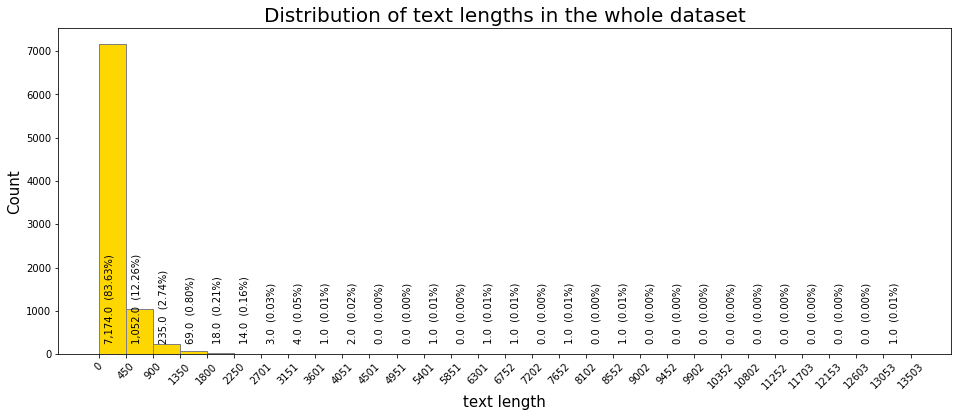

In [134]:
hist_with_perc(log_cols['textLength'],30,'Distribution of text lengths in the whole dataset','text length','Count','gold')

Now, to see a better picture, let's take a look at the distribution of the text lengths which falls in the top 90% of all values, the bottom 10% of the values and the ones that fall in between.

In [135]:
cut_val = round((int(log_cols.shape[0]) * 0.05))
cut_val_top_length = log_cols.sort_values('textLength', ascending=False).head(cut_val).iloc[cut_val-1].textLength
cut_val_bottom_length = log_cols.sort_values('textLength', ascending=True).head(cut_val).iloc[cut_val-1].textLength

print('nr of rows from 5% to 95%: ', log_cols[(log_cols['textLength']<cut_val_top_length) & (log_cols['textLength']>cut_val_bottom_length)].shape[0])
print('nr of rows above 95% and minimum length of them: ', log_cols[log_cols['textLength']>=cut_val_top_length].shape[0], cut_val_top_length)
print('nr of rows below 5% and maximum length of them: ',log_cols[log_cols['textLength']<=cut_val_bottom_length].shape[0], cut_val_bottom_length)
print('Total number of rows in dataset', log_cols.shape[0])

nr of rows from 5% to 95%:  7707
nr of rows above 95% and minimum length of them:  429 839
nr of rows below 5% and maximum length of them:  442 24
Total number of rows in dataset 8578


Let's plot all these three subsets for a closer look: <hr/>

***Distribution of 5% of the longest texts: ***

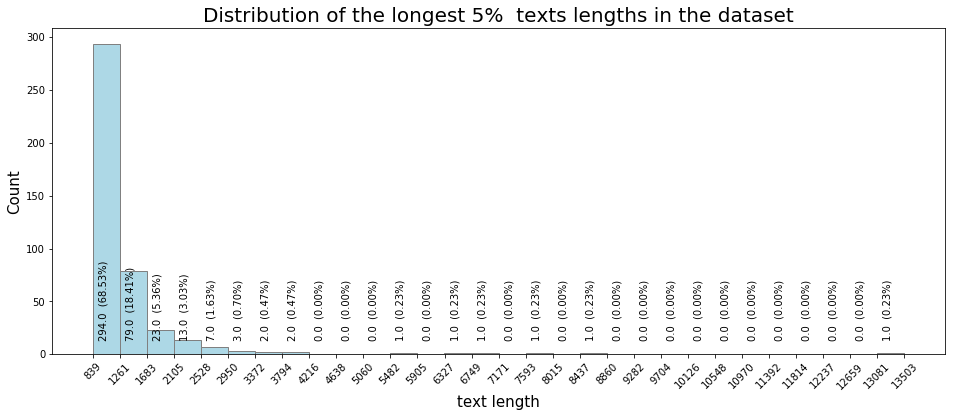

In [136]:
hist_with_perc(log_cols[log_cols['textLength']>=cut_val_top_length]['textLength'],
               30,'Distribution of the longest 5%  texts lengths in the dataset','text length','Count','lightblue')

***Distribution of 5% of the shortest texts: ***

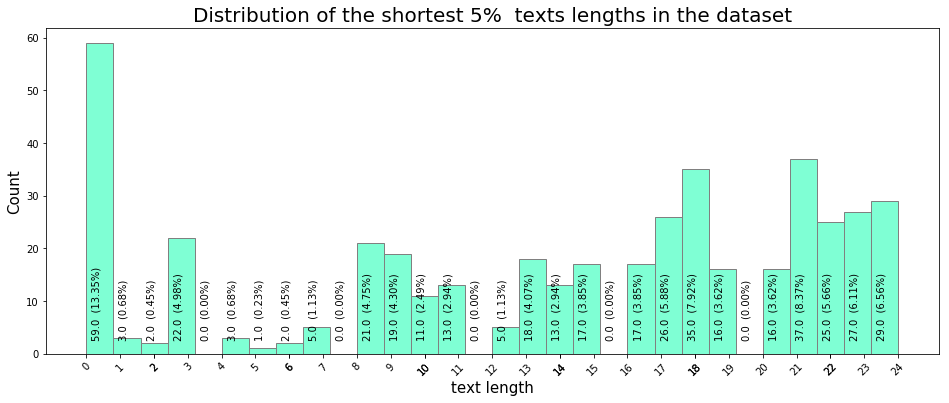

In [137]:
hist_with_perc(log_cols[log_cols['textLength']<=cut_val_bottom_length]['textLength'],
               30,'Distribution of the shortest 5%  texts lengths in the dataset','text length','Count','aquamarine')

***Distribution of of the texts between 10%-90% percentile length: ***

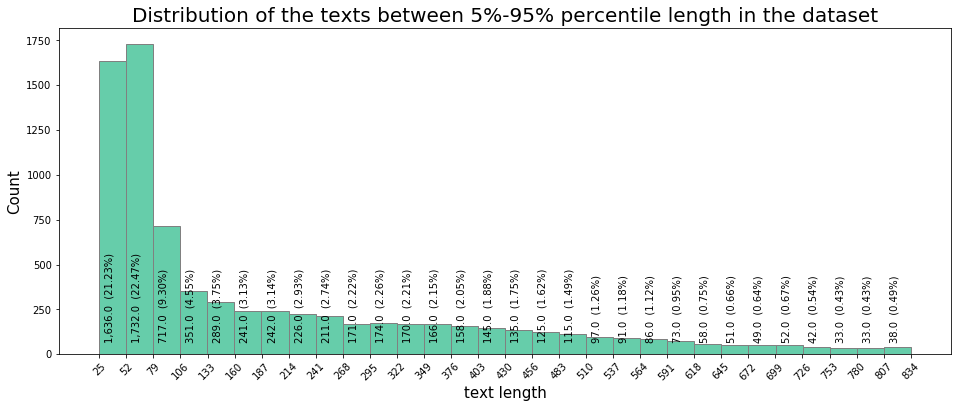

In [138]:

hist_with_perc(log_cols[(log_cols['textLength']<cut_val_top_length)&(log_cols['textLength']>cut_val_bottom_length)].textLength,
               30,'Distribution of the texts between 5%-95% percentile length in the dataset',
               'text length','Count','mediumaquamarine')

**After analysis, need to decide to remove certain percent of the longest and shortest texts.**
Currently, thinking to remove top 7% and bottom 3% of rows. 
<hr/>
*Remove the rows which have too long and too short texts code below*

In [152]:
#detect the number of rows that fall in top % and bottom %
top= 0.01
bottom = 0.02
cutoff_percent_top = round((int(log_cols.shape[0]) * top))
cutoff_percent_bottom = round((int(log_cols.shape[0]) * bottom))
print('Total number of rows in dataset:', str(log_cols.shape[0]))
print('Number of top '+str(round(top*100))+'% of the rows: ', str(cutoff_percent_top))
print('Number of bottom '+str(round(bottom*100))+'% of the rows: ', str(cutoff_percent_bottom))

value_Longest = log_cols.sort_values('textLength', ascending=False).head(cutoff_percent_top).iloc[cutoff_percent_top-1].textLength
value_shortest = log_cols.sort_values('textLength', ascending=True).head(cutoff_percent_bottom).iloc[cutoff_percent_bottom-1].textLength

print('length of the text, above which to filter out the rows: ', str(value_Longest))
print('length of the text, below which to filter out the rows: ', str(value_shortest))

log_cols[log_cols['textLength']<=value_shortest].to_csv('shortest_3pct.csv')
log_cols[log_cols['textLength']>=value_Longest].to_csv('longest_7pct.csv')

Total number of rows in dataset: 8578
Number of top 1% of the rows:  86
Number of bottom 2% of the rows:  172
length of the text, above which to filter out the rows:  1504
length of the text, below which to filter out the rows:  13


In [141]:
log_cut = log_cols[(log_cols['textLength']>value_shortest) & (log_cols['textLength']<value_Longest)]

<h3> 1.6 Combine all texts by developers </h3><br>
group the texts together that are manually written by the same developer in the same project. The whole texts willbe used as an input for third-party personality insights API. 

In [142]:

# loop through the projects, then through the authors and combine the texts written by the given author in the given project
# store the project, author and text data into series and form a data frame.

df_proj_name = []
df_user_name = []
df_user_text = []
df_texts_count = []
df_texts_length = []
df_words_in_text = []
for project in log_cut['project'].unique():
    for dev_user in log_cut[log_cut['project']==project]['author'].unique():
        user_txt = ''       
        texts_count = 0
        texts_length = 0
        words_in_text = 0
        curr_df = log_cut[(log_cut['project']==project) & (log_cut['author']==dev_user)]
        for index, row in curr_df.iterrows():
            user_txt = str(user_txt) + str(row['text']) + '. '
            texts_count = texts_count + 1
            texts_length = texts_length + len(row['text'])
            words_in_text = words_in_text + len(row['text'].split()) 
        df_proj_name.append(project)
        df_user_name.append(dev_user)
        df_user_text.append(user_txt)
        df_texts_count.append(texts_count)
        df_texts_length.append(texts_length)
        df_words_in_text.append(words_in_text)
    
user_text_combined = pd.DataFrame({'project':df_proj_name,
                   'user':df_user_name, 
                   'text':df_user_text,
                    'count_of_texts':df_texts_count,
                    'words_in_text':df_words_in_text,
                    'texts_length':df_texts_length})
     
user_text_combined.to_csv('user_text_combined.csv')
print(user_text_combined.shape)
user_text_combined.head(3)

(618, 6)


,project,user,text,count_of_texts,words_in_text,texts_length
0,xd,aliiqbal,Cant completely remove custom module after put...,1,9,64
1,xd,grussell,Custom conversion is broken. If the custom doe...,59,1891,11088
2,xd,dgarcia,If I try to use when developing a Spring XD mo...,1,30,152


**<font color="red">!!! Important notice</font>** IBM Watson says that minimum of 600 words are required for the proper personality report.

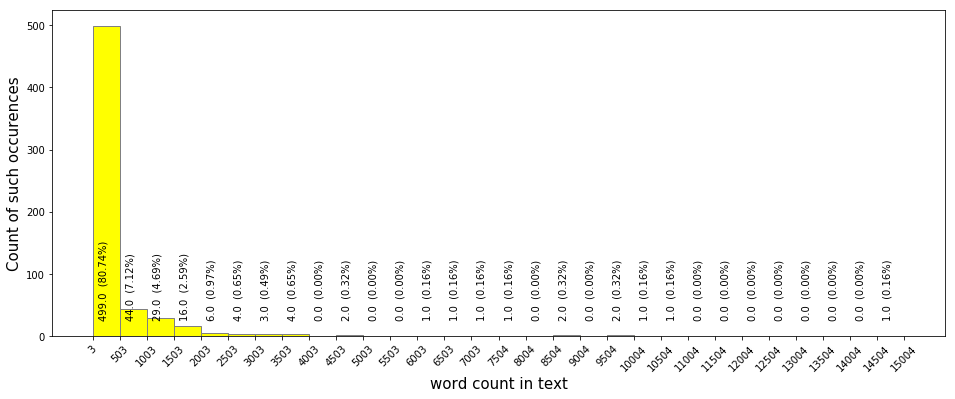

In [143]:
hist_with_perc(user_text_combined['words_in_text'],
               30,'','word count in text','Count of such occurences','yellow')

In [144]:
user_text_combined[user_text_combined['words_in_text']>600].shape[0]

108

In [138]:
users.head()

,Unnamed: 0,displayName,emailAddress,name,project,role,timeZone
0,0,NaN,NaN,NaN,xd,assignee,NaN
1,2,Janne Valkealahti,janne dot valkealahti at gmail dot com,jvalkeal,xd,assignee,Europe/London
2,5,Gary Russell,grussell at gopivotal dot com,grussell,xd,assignee,America/New_York
3,10,Artem Bilan,abilan at pivotal dot io,abilan,xd,assignee,America/New_York
4,11,David Turanski,dturanski at gopivotal dot com,dturanski,xd,assignee,America/New_York


In [248]:
users_df = users[['displayName','emailAddress','name','project']]
users_df = users_df[['displayName','emailAddress','name','project']].drop_duplicates()


In [257]:
user_texts_emails = pd.merge(user_text_combined, users_df, how = 'left',
                                   left_on = ['project', 'user'],
                                   right_on = ['project', 'name'])[['project','user','text','count_of_texts','words_in_text','texts_length','emailAddress']]


user_texts_emails.groupby(['user','emailAddress']).count()

,,project,text,count_of_texts,words_in_text,texts_length
user,emailAddress,,,,,
AlbWebbergate,a.bonacina@webbergate.com,1,1,1,1,1
Bartek Plotka,bwplotka at gmail dot com,1,1,1,1,1
CREATIVE KAIZEN,kontakt@creativekaisen.pl,1,1,1,1,1
CalamarBicefalo,josecarlosvalerosanchez at gmail dot com,1,1,1,1,1
Claus Stilborg,cb@appsolution.dk,1,1,1,1,1
CollinPrice,collin.price@meridiancu.ca,1,1,1,1,1
DustyP53,dusty dot pressley at gmail dot com,1,1,1,1,1
JamesYongQiaoWang,yqwyq at cn dot ibm dot com,1,1,1,1,1
Pablo.Musumeci,Pablo dot Musumeci at mulesoft dot com,1,1,1,1,1


In [265]:
text = 'I am the word, number one. This is the other word, number second. here comes the third one, third word'

i = 0
for word in text.split():
    if word=='word':
        i= i+1
        print(word)
    print(word)
print(i)

I
am
the
word,
number
one.
This
is
the
other
word,
number
second.
here
comes
the
third
one,
third
word
word
1


In [240]:
users_df[pd.isnull(users_df.emailAddress)==True]

,displayName,emailAddress,name,project


<h1> <font color='red'> !!!</font> </h1>
<h2> All Code below is still under the development and experimental. Should not be taken into account yet <h2>

In [117]:
from __future__ import print_function
import json
from os.path import join, dirname
from ibm_watson import PersonalityInsightsV3
import csv
import os

In [118]:
service = PersonalityInsightsV3(
    version='2017-10-13',
    ## url is optional, and defaults to the URL below. Use the correct URL for your region.
    url='https://gateway-lon.watsonplatform.net/personality-insights/api',
    iam_apikey='oUImnq_VXfyDypESNM8rmtJOpzUzg6Zsp_TnZxmwHotR')

'''
another account credentials:
BFsOsCFLvQgZHLicoAj_ywnJ_92h0ry0gTgKudmuDmjm
https://gateway-lon.watsonplatform.net/personality-insights/api
'''

'\nanother account credentials:\nBFsOsCFLvQgZHLicoAj_ywnJ_92h0ry0gTgKudmuDmjm\nhttps://gateway-lon.watsonplatform.net/personality-insights/api\n'

In [119]:
with open(join(dirname('__file__'), 'personality-v3.json')) as \
        profile_json:
    profile = service.profile(
        profile_json.read(),
        'application/json',
        raw_scores=True,
        consumption_preferences=True).get_result()

#print(json.dumps(profile, indent=2))

In [120]:
'''
# filter changelog with the textual fields
time_log_filtered = changelog[changelog['field'].isin(['timeestimate', 'timespent', 'Time Spent', 'timeoriginalestimate'])]

# take only necessary columns 
cols = ['key', 'project', 'author', 'field', 'created', 'to', 'toString']
time_log_cols = time_log_filtered[cols]

time_log_cols.field.unique()



#1. in descriptions: only leave the latest edited descriptions per unique project key. 
        ###(get uniques issues, join log with 'project', 'key', 'status' and get the lates onr by created date.)
time_log_grouped = time_log_cols.groupby((['project', 'key', 'field'])).agg({'created':'max'})
time_log_grouped.reset_index(level= [0,1,2], inplace=True)

time_latest_logs_from_issues = pd.merge(time_log_cols, time_log_grouped, how = 'inner',
                                   left_on = ['project', 'key', 'field', 'created'],
                                   right_on = ['project', 'key', 'field', 'created'])

print(time_log_cols.shape[0], time_log_grouped.shape[0], time_latest_logs_from_issues.shape[0]) 
time_latest_logs_from_issues.head(6)
time_log_cols = time_latest_logs_from_issues

#Let's find out, how many of the issues have both, estimated time and actual time spent
time_log_cols = time_log_cols[(time_log_cols['toString'] != '0') & (pd.isnull(time_log_cols['toString']) == False) ].sort_values('key')
time_log_cols_gr = time_log_cols.groupby(['key', 'project', 'author']).agg({'created': 'count'})
ime_log_cols_gr_ds = time_log_cols_gr.reset_index(level= [0, 1, 2], inplace=False)
ime_log_cols_gr_ds[ime_log_cols_gr_ds['created']>1].shape[0]

# TO-DO: 
# 1) Calculate actual completion time by: Dataset Issues, column 'created', column 'resolutiondate' when 'resolution.name'=='Complete'
# 2) Calculate the story points for the issues calculated above.
# 3) 
'''

"\n# filter changelog with the textual fields\ntime_log_filtered = changelog[changelog['field'].isin(['timeestimate', 'timespent', 'Time Spent', 'timeoriginalestimate'])]\n\n# take only necessary columns \ncols = ['key', 'project', 'author', 'field', 'created', 'to', 'toString']\ntime_log_cols = time_log_filtered[cols]\n\ntime_log_cols.field.unique()\n\n\n\n#1. in descriptions: only leave the latest edited descriptions per unique project key. \n        ###(get uniques issues, join log with 'project', 'key', 'status' and get the lates onr by created date.)\ntime_log_grouped = time_log_cols.groupby((['project', 'key', 'field'])).agg({'created':'max'})\ntime_log_grouped.reset_index(level= [0,1,2], inplace=True)\n\ntime_latest_logs_from_issues = pd.merge(time_log_cols, time_log_grouped, how = 'inner',\n                                   left_on = ['project', 'key', 'field', 'created'],\n                                   right_on = ['project', 'key', 'field', 'created'])\n\nprint(time_log_

In [232]:
texts =['Email: test subject here', 'Email RE: Test Subject here', 'Email Re[4]:Test Subject here']

In [233]:
texts

['Email: test subject here',
 'Email RE: Test Subject here',
 'Email Re[4]:Test Subject here']

In [234]:
# Detect the subejct by removing 'email', 're' and 're[0]' parts of the texts 
for txt in texts:
    re_parts = re.sub('(email|Email)(:|\s)(((|(r|R)(e|E))(:|\[[0-9]\]:))|)', '', txt)
    re_parts = re_parts.strip()
    print(re_parts)
    

test subject here
Test Subject here
Test Subject here


In [253]:
re.search('(r|R)(e|E)(\[[0-9]\])',  'Email Re[4]:Test Subject here')

<re.Match object; span=(6, 11), match='Re[4]'>

In [254]:
for txt in texts:
    re_with_num = re.search('(r|R)(e|E)(\[[0-9]\])', txt)
    if (re_with_num is not None):
        re_nr = re.search('[0-9]', re_with_num.group()).group()
    else:
        re_with_num = re.search('(email|Email)\s(r|R)(e|E)', txt)
        if (re_with_num is not None):
            re_nr = 1
        else:
            re_nr = 0
    print(txt, int(re_nr)+1)
        

Email: test subject here 1
Email RE: Test Subject here 2
Email Re[4]:Test Subject here 5


In [245]:
myword = 'Email'
nr = 0
for txt in texts:
    words = txt.split()
    for word in words:
        print(word)
        if word==myword:
            nr = nr+1
        else:
            nr=nr    
    
print(myword, nr)

Email:
test
subject
here
Email
RE:
Test
Subject
here
Email
Re[4]:Test
Subject
here
Email 2


In [243]:
'first second thierd fourth'.split()

['first', 'second', 'thierd', 'fourth']